# Detector automático de habla 

Utlilizando algunas representaciones como la transformada de fourier, la transformada en tiempo corto, la densidad de potencia espectral, Mel Frequency Cepstrum Coefficients (MFCC) y un bosque aleatorio (Random Forest) para la clasificación.





*   Cuadernos utilizados para grabar base de datos:
    
    * [Rafael](https://colab.research.google.com/drive/1c4TLR6DfgpJleFoEMAR5oJqdKh48svF_?usp=sharing)
    * [Marcos](https://colab.research.google.com/drive/1mqdaElNCqNUA4px2oq8arEVnalrEJPWD?usp=sharing)

* [Cuadenro para evaluar modelo](https://colab.research.google.com/drive/1E2n4CzJ61mOlp6B5a1uz0zMSq7E27Upe?usp=sharing)



### Rafael Mejía Zuluaga
### Marcos Loaiza Arias

In [ ]:
# Descargar archivo con funciones:

#  https://drive.google.com/file/d/1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx/view?usp=sharing

FILEID = "1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx"
#1sui-FJI5znNJuQOk0whM6PALI89XfKss
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Codigos.zip && rm -rf /tmp/cookies.txt
!unzip Codigos.zip
!dir

--2020-12-09 14:36:31--  https://docs.google.com/uc?export=download&confirm=&id=1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx
Resolving docs.google.com (docs.google.com)... 173.194.210.100, 173.194.210.139, 173.194.210.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-10-docs.googleusercontent.com/docs/securesc/de1k0a7dll4vkdgpcbsq4hbng2tu6nnn/b0ge7jgoac01vnrujf869dbn8vm9of91/1607524575000/10854142796765961935/06232750895814238843Z/1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx?e=download [following]
--2020-12-09 14:36:31--  https://doc-0g-10-docs.googleusercontent.com/docs/securesc/de1k0a7dll4vkdgpcbsq4hbng2tu6nnn/b0ge7jgoac01vnrujf869dbn8vm9of91/1607524575000/10854142796765961935/06232750895814238843Z/1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx?e=download
Resolving doc-0g-10-docs.googleusercontent.com (doc-0g-10-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting

In [ ]:
!pip install ffmpeg-python
!pip install python_speech_features
 
import sys
sys.path.insert(1, './Codigos')

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import numpy as np
from IPython.display import Audio
from SpeechFunctions import *
import pandas as pd
from python_speech_features import mfcc

In [ ]:
# https://drive.google.com/file/d/1-3ltPG0GXW-K4zC6vfN0PIIHa5Ct1bdp/view?usp=sharing

# Cargar base de datos
FILEID = "1-3ltPG0GXW-K4zC6vfN0PIIHa5Ct1bdp"
#1sui-FJI5znNJuQOk0whM6PALI89XfKss
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Database.zip && rm -rf /tmp/cookies.txt
!unzip Database.zip
!dir

--2020-12-08 21:52:45--  https://docs.google.com/uc?export=download&confirm=Cnf_&id=1-3ltPG0GXW-K4zC6vfN0PIIHa5Ct1bdp
Resolving docs.google.com (docs.google.com)... 64.233.189.102, 64.233.189.139, 64.233.189.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3g-docs.googleusercontent.com/docs/securesc/4bert4r1qepdu2cbt42fgg3f0ots5fhn/14308r1fp3kken5c1mgfrt7n9emmhhga/1607464350000/10854142796765961935/00079298276861620284Z/1-3ltPG0GXW-K4zC6vfN0PIIHa5Ct1bdp?e=download [following]
--2020-12-08 21:52:45--  https://doc-14-3g-docs.googleusercontent.com/docs/securesc/4bert4r1qepdu2cbt42fgg3f0ots5fhn/14308r1fp3kken5c1mgfrt7n9emmhhga/1607464350000/10854142796765961935/00079298276861620284Z/1-3ltPG0GXW-K4zC6vfN0PIIHa5Ct1bdp?e=download
Resolving doc-14-3g-docs.googleusercontent.com (doc-14-3g-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting

## Cargamos la base de datos:

In [ ]:
labels = ['Arriba','Abajo','Izquierda', 'Derecha','Back','Ok']
sujetos = ['Rafael','Marcos']
Xraw,y,fs = load_database(labels,sujetos)  #función para cargar base de datos

In [ ]:
print(Xraw.shape)
print(y.shape)
print(fs)

(484, 96000)
(484,)
48000


## Ejemplo base de datos

2 - Izquierda


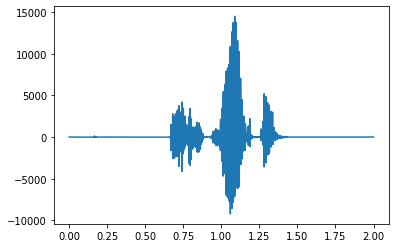

In [ ]:
ind = np.random.randint(y.shape[0])

print(f"{y[ind]} - {labels[y[ind]]}")
t = np.linspace(0,2,2*fs)
plt.plot(t,Xraw[ind])
Audio(Xraw[ind],rate=fs)


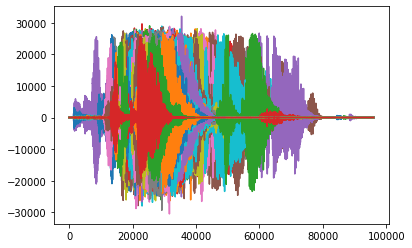

In [ ]:
plt.plot(Xraw.T)
plt.show()
Audio(Xraw.mean(axis=0),rate=fs)

# Representaciones

## Fast Fourier Transform (FFT):

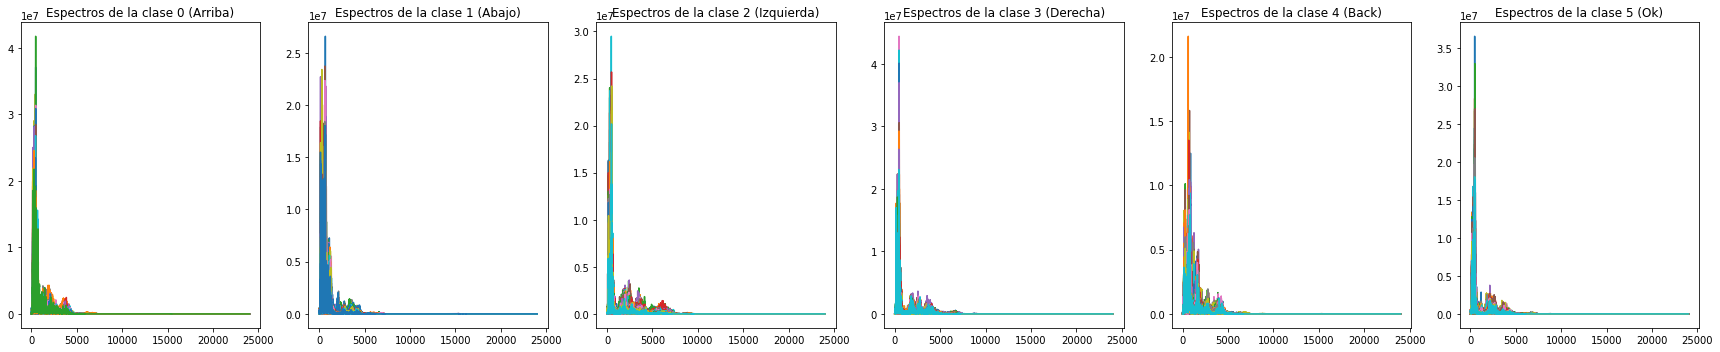

In [ ]:
Xrfft = np.abs(np.fft.rfft(Xraw,axis=1))
vf = np.fft.rfftfreq(Xraw.shape[1],1/fs)
Xrfft.shape

plt.figure(figsize=(24,5))

for i in range(len(labels)):
  plt.subplot(1,6,i+1)
  plt.plot(vf,Xrfft[y==i].T)
  plt.title(f"Espectros de la clase {i} ({labels[i]})")
plt.tight_layout()
plt.show()

In [ ]:
cal_momentos(Xrfft).reshape(Xrfft.shape[0],-1).shape

(484, 5)

## Short Time Fourier Transform (STFT):

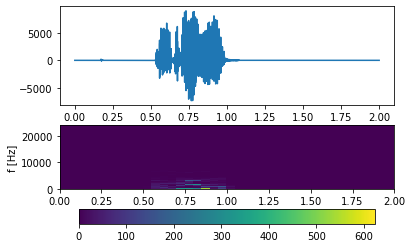

In [ ]:
f,t,Xstft = stft(Xraw,fs=fs,nperseg=4800,axis=1)
Xstft = abs(Xstft)
trial = 10

fig, ax = plt.subplots(2, 1)
vt = np.arange(0,Xraw.shape[1]/(fs),1/fs)
ax[0].plot(vt,Xraw[trial])
im = ax[1].pcolormesh(t, f, Xstft[trial])
fig.colorbar(im, ax=ax[1],orientation="horizontal",pad=0.2)
plt.gca()
plt.xlabel('t [seg]')
plt.ylabel('f [Hz]')
plt.show()
Audio(Xraw[trial],rate=fs)

In [ ]:
cal_momentos(Xstft.reshape(Xraw.shape[0],-1)).reshape(Xraw.shape[0],-1).shape

(484, 5)

## Power Spectral Density (PSD):

(484, 961)


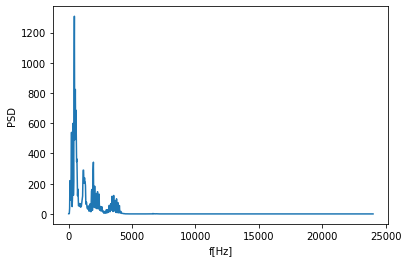

In [ ]:
fpsd, Xpsd = welch(Xraw, fs=fs, nperseg=1920,axis=1)
print(Xpsd.shape)
fpsd
plt.plot(fpsd,Xpsd[trial,:])
plt.xlabel('f[Hz]')
plt.ylabel('PSD')
plt.show()
Audio(Xraw[trial],rate=fs)

In [ ]:
cal_momentos(Xpsd).reshape(Xraw.shape[0],-1).shape

(484, 5)

## Mel Frequency Cepstrum Coefficients (MFCC):

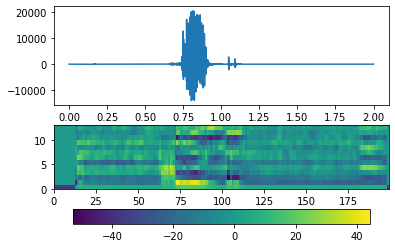

In [ ]:
Xmfcc = mel_coefficients(Xraw,fs=fs,winlen=0.025)

trial = 200

fig, ax = plt.subplots(2, 1)

ax[0].plot(vt,Xraw[trial])
im = ax[1].pcolormesh(Xmfcc[trial].T)
fig.colorbar(im, ax=ax[1],orientation="horizontal",pad=0.2)
plt.show()
Audio(Xraw[trial],rate=fs)

In [ ]:
Xmfcc.reshape(Xraw.shape[0],-1).shape

(484, 2587)

# Entrenamieno, validación y evaluación con clase de preproceso:

Primero se hizo una búsqueda por grilla para intentar determinar los mejores valores para los segmentos de psd, stft y mfcc

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   47.5s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 

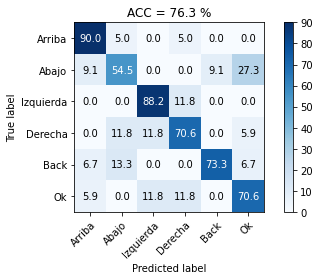

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain,ytest = train_test_split(Xraw,y,test_size=0.2)


parameters = {'pre__mfcc_winlen':[20,40,60,80,100],
              'pre__psd_winlen': [20,40,60,80,100],
               'pre__stft_winlen':[20,40,60,80,100],  #Longitud del segmento en ms para stft, mfcc y psd
              'pre__fs':[48000]}  

steps = [('pre', dummy_speech(fs=48000,mfcc_winlen=20,psd_winlen=20,stft_winlen=20)),
         ('scaler',StandardScaler()),
         ('cla', RandomForestClassifier())]


grid_search = GridSearchCV(Pipeline(steps), parameters, n_jobs=-1,cv=5,
                                scoring='balanced_accuracy',verbose=10)


grid_search.fit(Xtrain, ytrain)


best_model = grid_search.best_estimator_


ye = best_model.predict(Xtest)


acc = accuracy_score(ytest,ye)

plot_confusion_matrix(
                      ytest, ye, 
                      classes=labels,
                      normalize=True,
                      title='ACC = %.1f %%' % (100*acc)
                      )

plt.show()
"""

In [ ]:
# print(classification_report(ytest,ye))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.55      0.55      0.55        11
           2       0.79      0.88      0.83        17
           3       0.71      0.71      0.71        17
           4       0.92      0.73      0.81        15
           5       0.71      0.71      0.71        17

    accuracy                           0.76        97
   macro avg       0.75      0.75      0.75        97
weighted avg       0.77      0.76      0.76        97



In [ ]:
# best_model

Pipeline(memory=None,
         steps=[('pre',
                 dummy_speech(fs=16000, mfcc_winlen=40, psd_winlen=40,
                              stft_winlen=100)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('cla',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score

In [ ]:
#Entrenar modelo
# best_model.fit(Xraw,y)

Pipeline(memory=None,
         steps=[('pre',
                 dummy_speech(fs=16000, mfcc_winlen=40, psd_winlen=40,
                              stft_winlen=100)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('cla',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score

## Utilizando la representación completa de MFCC y no sus momentos:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain,ytest = train_test_split(Xraw,y,test_size=0.3)


steps = [('pre', dummy_speech(fs=48000,mfcc_winlen=25,psd_winlen=40,stft_winlen=100)),
         ('scaler',StandardScaler()),
         ('cla', RandomForestClassifier())]

model1 = Pipeline(steps)


model1.fit(Xtrain,ytrain)

Pipeline(memory=None,
         steps=[('pre',
                 dummy_speech(fs=48000, mfcc_winlen=25, psd_winlen=40,
                              stft_winlen=100)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('cla',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score

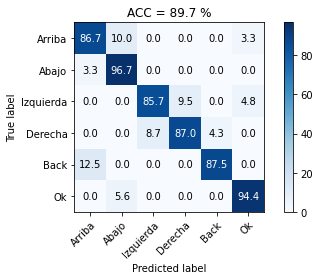

In [ ]:
ye = model1.predict(Xtest)

acc = accuracy_score(ytest,ye)

plot_confusion_matrix(
                      ytest, ye, 
                      classes=labels,
                      normalize=True,
                      title='ACC = %.1f %%' % (100*acc)
                      )

plt.show()


Los resultados mejoraron notablemente al hacer este cambio

## Relevancia de cada característica para la clasificación:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


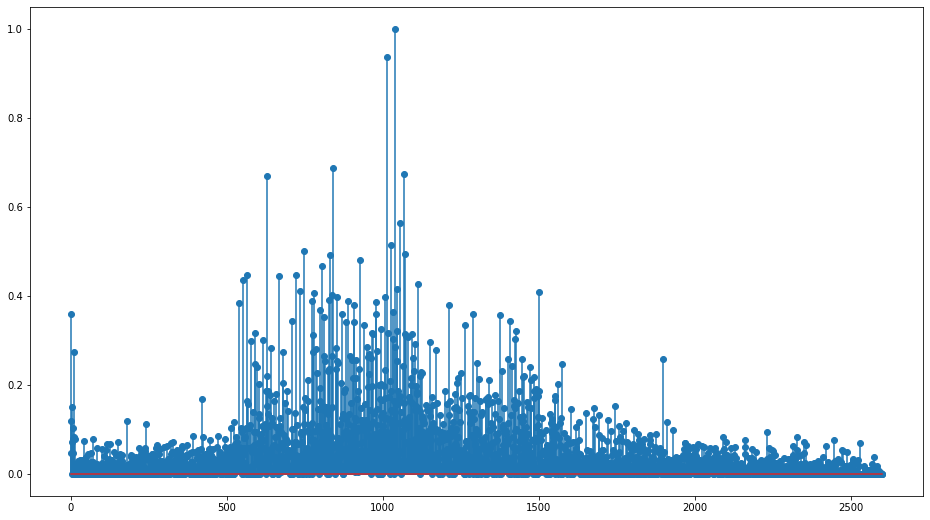

In [ ]:
rho = model1['cla'].feature_importances_
rho /= rho.max()
plt.figure(figsize=(16,9))
plt.stem(rho)
plt.show()

In [ ]:
rho.shape

(2602,)

## Grabar y evaluar registro nuevo:

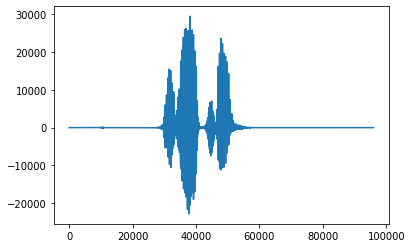

Derecha

Class Probabilities:


,Probability
Arriba,0.20
Abajo,0.00
Izquierda,0.15
Derecha,0.51
Back,0.11
Ok,0.03


In [ ]:
Xnew,fs = get_audio()
Xnew = np.pad(Xnew,(0,2*fs-Xnew.shape[0]),'constant',constant_values=(0,0))
 
pred = model1.predict(Xnew)
 
plt.plot(Xnew)
plt.show()
 
probabilities = model1.predict_proba(Xnew)
 
print(labels[int(pred)])
print("\nClass Probabilities:")
class_probabilities = pd.DataFrame(data=probabilities.reshape(-1),index=labels,columns=['Probability'])
class_probabilities

## Guardar modelo (para correr en local o en otro notebook):

In [ ]:
from joblib import load, dump

In [ ]:
best_model_7 = model1

savedata = {
        'labels':labels,
        'best_model_7':best_model_7        
          } 
dump(savedata,'speech_model7.joblib')

['speech_model7.joblib']

In [ ]:
best_model_7

Pipeline(memory=None,
         steps=[('pre',
                 dummy_speech(fs=48000, mfcc_winlen=25, psd_winlen=40,
                              stft_winlen=100)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('cla',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score